# Representations


In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from domoku.tools import GomokuTools as Gt
from alphazero.gomoku_game import GomokuGame
from domoku.policies.softadvice import MaxInfluencePolicyParams, MaxInfluencePolicy
from domoku.policies.maximal_criticality import MaxCriticalityPolicy
from domoku.constants import BLACK

In [6]:
SIZE=15

In [9]:
examine = 'H8H7I10I9G9H11I6F10J4F11L5L4L7I5I7K6J6K8K5'

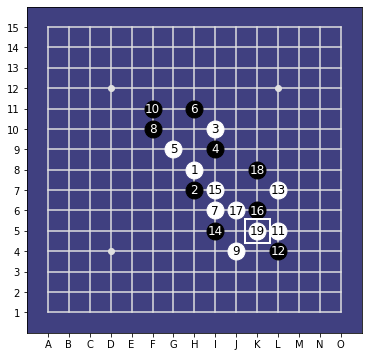

In [10]:
from domoku.board import GomokuBoard as LegacyBoard
stones = Gt.string_to_stones(examine)
board = LegacyBoard(n=SIZE, disp_width=6, stones=stones)
board.display()

In [5]:
from alphazero.gomoku_board import GomokuBoard

board = GomokuBoard(SIZE, examine, x_means='b')

In [6]:
board.stones

[B2, B6, C4, D4, D5, E2, B4, C5]

### The mathematical representation includes the boundary

In [7]:
Gt.print_bin(board.math_rep, combine=True)

shape: (9, 9, 3)
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 0 2 1 0 0 0 0]
 [0 0 1 1 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]


### The string rep comes from a hash of the field

In [8]:
board.get_string_representation()

'8037062031761109436'

### The moves and the policy don't know about the boundary

In [9]:
hard_policy = MaxCriticalityPolicy(board_size=SIZE, overconfidence=2.0)
params = MaxInfluencePolicyParams(
    board_size=SIZE,
    sigma=.8,
    iota=20,
    radial_constr = [.0625, .125, .25, .5],
    radial_obstr = [-.0625, -.125, -.25, -.5]
)
soft_policy = MaxInfluencePolicy(params, criticality_model=None, pov=BLACK)

2022-06-11 12:33:17.348291: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/wgiersche/.local/share/virtualenvs/DeepGomoku-cXtJ_EtM/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


### The plotter also ignores the boundary

In [10]:
board.plot()

                             
 7    .  .  .  .  .  .  .    
 6    .  O  .  .  .  .  .    
 5    .  .  O  X  .  .  .    
 4    .  X  X  O  .  .  .    
 3    .  .  .  .  .  .  .    
 2    .  X  .  .  O  .  .    
 1    .  .  .  .  .  .  .    
                             
      A  B  C  D  E  F  G


In [11]:
board.print_pi(soft_policy)

[[   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0 1341  530    0  346    0    0]
 [   0    0   43    0    0   44    0]
 [   0    0    0    0    0    0    0]]


In [12]:
Move=board.Stone

In [13]:
next_move = int(np.argmax(soft_policy(board.math_rep)))
next_move = Move(next_move)
print(f"{next_move}, row={next_move.r}, column={next_move.c}, ord={next_move.i}")

B3, row=4, column=1, ord=29


In [14]:
board.act(next_move).plot()

                             
 7    .  .  .  .  .  .  .    
 6    .  O  .  .  .  .  .    
 5    .  .  O  X  .  .  .    
 4    .  X  X  O  .  .  .    
 3    .  X  .  .  .  .  .    
 2    .  X  .  .  O  .  .    
 1    .  .  .  .  .  .  .    
                             
      A  B  C  D  E  F  G


In [15]:
game = GomokuGame(SIZE, detector=hard_policy, model=soft_policy)

In [16]:
pi = np.squeeze(soft_policy(board.math_rep))
symmetries = game.get_symmetries(board.canonical_representation(), pi)

In [21]:
for s, p in symmetries:
    Gt.print_bin(s, combine=True)
    print((np.reshape(np.array(p)*1000, [7,7])).astype(int))

shape: (9, 9, 3)
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 2 0 0 0]
 [0 0 0 0 2 1 0 0 0]
 [0 0 2 2 2 0 1 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]
[[   0    0    0    0    0    0    0]
 [   0   62    0    0    0    0    0]
 [   0    0 1065    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0   97  280    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]]
shape: (9, 9, 3)
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 2 1 0 0 0 0]
 [0 0 0 1 2 0 0 0 0]
 [0 0 1 0 2 2 2 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]
[[   0    0    0    0    0    0    0]
 [   0    0    0    0    0   62    0]
 [   0    0    0    0 1065    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0  280   97    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]]
shape: (9, 9, 3)
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 

---

# Pooling

In [34]:
import tensorflow as tf
import numpy as np

pool = tf.keras.layers.MaxPooling3D(pool_size=(1,1, 2))

x = [[[1, 1, 1],[1, 1, 1],[1, 5, 1]], [[2, 3, 4],[4, 3, 2],[3, 1, 3]]]
x = np.array(x).astype(float)
x = np.rollaxis(x, 0, 3).reshape((1, 3, 3, 2, 1))
print(x.shape)

pool(x)

(1, 3, 3, 2, 1)


<tf.Tensor: shape=(1, 3, 3, 1, 1), dtype=float32, numpy=
array([[[[[2.]],

         [[3.]],

         [[4.]]],


        [[[4.]],

         [[3.]],

         [[2.]]],


        [[[3.]],

         [[5.]],

         [[3.]]]]], dtype=float32)>

In [28]:
pool(x).shape

TensorShape([1, 3, 3, 1, 1])